Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

Decompress Files If Needed

In [2]:
!gunzip dstewar6_20241106040111.csv.gz

Load in the Data

In [2]:
#load in new york data
chunksize = 500000
data_chunks = []
for chunk in pd.read_csv('mpanchbh_20241028222248.csv', chunksize = chunksize):
    data_chunks.append(chunk)

df_ny = pd.concat(data_chunks, ignore_index=True)

In [3]:
#load in indiana data
chunksize = 500000
data_chunks = []
for chunk in pd.read_csv('dstewar6_20241106040111.csv', chunksize = chunksize):
    data_chunks.append(chunk)

df_ind = pd.concat(data_chunks, ignore_index=True)

In [4]:
#create dataframe
df_ny = pd.DataFrame(df_ny)
df_ind = pd.DataFrame(df_ind)

In [5]:
df_ny.head() #check data is what you want

,calc_base_wt_in_gm,transaction_date,buyer_county,buyer_bus_act,buyer_addl_co_info,drug_name,mme_conversion_factor
0,7.567500,01/01/2006,SAINT LAWRENCE,CHAIN PHARMACY,KINNEY DRUGS #09,HYDROCODONE,1.0
1,2.270250,01/01/2006,CAYUGA,CHAIN PHARMACY,KINNEY DRUGS #62,HYDROCODONE,1.0
2,0.572708,01/01/2006,SUFFOLK,RETAIL PHARMACY,NaN,HYDROCODONE,1.0
3,1.145417,01/01/2006,QUEENS,RETAIL PHARMACY,D/B/A CROSS BAY CHEMIST,HYDROCODONE,1.0
4,0.572708,01/01/2006,QUEENS,RETAIL PHARMACY,NaN,HYDROCODONE,1.0


In [6]:
df_ind.head()

,transaction_date,calc_base_wt_in_gm,buyer_bus_act,buyer_addl_co_info,buyer_county,mme_conversion_factor,drug_name
0,01/01/2010,0.143231,CHAIN PHARMACY,NaN,DUBOIS,1.0,HYDROCODONE
1,01/01/2010,0.143231,CHAIN PHARMACY,NaN,OWEN,1.0,HYDROCODONE
2,01/01/2010,0.143231,CHAIN PHARMACY,NaN,OWEN,1.0,HYDROCODONE
3,01/01/2010,0.143231,CHAIN PHARMACY,NaN,LAWRENCE,1.0,HYDROCODONE
4,01/01/2010,0.143231,CHAIN PHARMACY,NaN,BOONE,1.0,HYDROCODONE


In [7]:
#get year and month and create column
df_ny['transaction_date'] = pd.to_datetime(df_ny['transaction_date'], format='%m/%d/%Y')
df_ny['year'] = df_ny['transaction_date'].dt.year
df_ny['month'] = df_ny['transaction_date'].dt.month
df_ny.head()

,calc_base_wt_in_gm,transaction_date,buyer_county,buyer_bus_act,buyer_addl_co_info,drug_name,mme_conversion_factor,year,month
0,7.567500,2006-01-01,SAINT LAWRENCE,CHAIN PHARMACY,KINNEY DRUGS #09,HYDROCODONE,1.0,2006,1
1,2.270250,2006-01-01,CAYUGA,CHAIN PHARMACY,KINNEY DRUGS #62,HYDROCODONE,1.0,2006,1
2,0.572708,2006-01-01,SUFFOLK,RETAIL PHARMACY,NaN,HYDROCODONE,1.0,2006,1
3,1.145417,2006-01-01,QUEENS,RETAIL PHARMACY,D/B/A CROSS BAY CHEMIST,HYDROCODONE,1.0,2006,1
4,0.572708,2006-01-01,QUEENS,RETAIL PHARMACY,NaN,HYDROCODONE,1.0,2006,1


In [8]:
df_ind['transaction_date'] = pd.to_datetime(df_ind['transaction_date'], format='%m/%d/%Y')
df_ind['year'] = df_ind['transaction_date'].dt.year
df_ind['month'] = df_ind['transaction_date'].dt.month
df_ind.head()

,transaction_date,calc_base_wt_in_gm,buyer_bus_act,buyer_addl_co_info,buyer_county,mme_conversion_factor,drug_name,year,month
0,2010-01-01,0.143231,CHAIN PHARMACY,NaN,DUBOIS,1.0,HYDROCODONE,2010,1
1,2010-01-01,0.143231,CHAIN PHARMACY,NaN,OWEN,1.0,HYDROCODONE,2010,1
2,2010-01-01,0.143231,CHAIN PHARMACY,NaN,OWEN,1.0,HYDROCODONE,2010,1
3,2010-01-01,0.143231,CHAIN PHARMACY,NaN,LAWRENCE,1.0,HYDROCODONE,2010,1
4,2010-01-01,0.143231,CHAIN PHARMACY,NaN,BOONE,1.0,HYDROCODONE,2010,1


In [9]:
#calculate total mme
df_ny['total_mme'] = df_ny['calc_base_wt_in_gm'] * 1000 * df_ny['mme_conversion_factor']
df_ny.head()

,calc_base_wt_in_gm,transaction_date,buyer_county,buyer_bus_act,buyer_addl_co_info,drug_name,mme_conversion_factor,year,month,total_mme
0,7.567500,2006-01-01,SAINT LAWRENCE,CHAIN PHARMACY,KINNEY DRUGS #09,HYDROCODONE,1.0,2006,1,7567.5000
1,2.270250,2006-01-01,CAYUGA,CHAIN PHARMACY,KINNEY DRUGS #62,HYDROCODONE,1.0,2006,1,2270.2500
2,0.572708,2006-01-01,SUFFOLK,RETAIL PHARMACY,NaN,HYDROCODONE,1.0,2006,1,572.7084
3,1.145417,2006-01-01,QUEENS,RETAIL PHARMACY,D/B/A CROSS BAY CHEMIST,HYDROCODONE,1.0,2006,1,1145.4169
4,0.572708,2006-01-01,QUEENS,RETAIL PHARMACY,NaN,HYDROCODONE,1.0,2006,1,572.7084


In [10]:
df_ind['total_mme'] = df_ind['calc_base_wt_in_gm'] * 1000 * df_ind['mme_conversion_factor']
df_ind.head()

,transaction_date,calc_base_wt_in_gm,buyer_bus_act,buyer_addl_co_info,buyer_county,mme_conversion_factor,drug_name,year,month,total_mme
0,2010-01-01,0.143231,CHAIN PHARMACY,NaN,DUBOIS,1.0,HYDROCODONE,2010,1,143.23051
1,2010-01-01,0.143231,CHAIN PHARMACY,NaN,OWEN,1.0,HYDROCODONE,2010,1,143.23051
2,2010-01-01,0.143231,CHAIN PHARMACY,NaN,OWEN,1.0,HYDROCODONE,2010,1,143.23051
3,2010-01-01,0.143231,CHAIN PHARMACY,NaN,LAWRENCE,1.0,HYDROCODONE,2010,1,143.23051
4,2010-01-01,0.143231,CHAIN PHARMACY,NaN,BOONE,1.0,HYDROCODONE,2010,1,143.23051


In [11]:
#calculate the monthly mme
monthly_mme_ny = df_ny.groupby(['buyer_county', 'year', 'month'])['total_mme'].sum().reset_index()
monthly_mme_ny.head()

,buyer_county,year,month,total_mme
0,ALBANY,2006,1,7.518827e+06
1,ALBANY,2006,2,6.010821e+06
2,ALBANY,2006,3,8.658889e+06
3,ALBANY,2006,4,6.308959e+06
4,ALBANY,2006,5,5.227228e+06


In [13]:
monthly_mme_ind = df_ind.groupby(['buyer_county', 'year', 'month'])['total_mme'].sum().reset_index()
monthly_mme_ind.head()

,buyer_county,year,month,total_mme
0,ADAMS,2010,1,1.118225e+06
1,ADAMS,2010,2,1.121061e+06
2,ADAMS,2010,3,1.258208e+06
3,ADAMS,2010,4,1.111680e+06
4,ADAMS,2010,5,1.096829e+06


In [14]:
#drop na
monthly_mme_ny.dropna(inplace=True)
monthly_mme_ny.head()

,buyer_county,year,month,total_mme
0,ALBANY,2006,1,7.518827e+06
1,ALBANY,2006,2,6.010821e+06
2,ALBANY,2006,3,8.658889e+06
3,ALBANY,2006,4,6.308959e+06
4,ALBANY,2006,5,5.227228e+06


In [15]:
monthly_mme_ind.dropna(inplace=True)
monthly_mme_ind.head()

,buyer_county,year,month,total_mme
0,ADAMS,2010,1,1.118225e+06
1,ADAMS,2010,2,1.121061e+06
2,ADAMS,2010,3,1.258208e+06
3,ADAMS,2010,4,1.111680e+06
4,ADAMS,2010,5,1.096829e+06


Merge ARCOS Data with County Population Estimates Data

In [16]:
#read in and manipulate ny county population estimates with fips codes
county_pop_ny = pd.read_csv("ny county pop estimates + fips.csv")
county_pop_ny['County Name'] = county_pop_ny['County Name'].str.upper()
county_pop_ny.columns = county_pop_ny.columns.str.strip()
year_cols = [col for col in county_pop_ny.columns if col.isdigit()]  # Extract year columns
county_pop_ny[year_cols] = county_pop_ny[year_cols].replace(',', '', regex=True).astype(int)
county_pop_long_ny = county_pop_ny.melt(id_vars=['FIPS', 'County Name'],
                                  var_name='year',
                                  value_name='population')
county_pop_long_ny['year'] = county_pop_long_ny['year'].astype(int)
print(county_pop_long_ny.head())

   FIPS     County Name  year  population
0    36  NEW YORK STATE  2006      303997
1     1          ALBANY  2006       49359
2     3        ALLEGANY  2006     1348164
3     5           BRONX  2006      200905
4     7          BROOME  2006       81342


In [26]:
#read in and manipulate ind county population estimates
county_pop_ind = pd.read_csv("indiana_pop_estimates.csv")
county_pop_ind = county_pop_ind.drop("Grand Total", axis=1)
county_pop_ind['County Name'] = county_pop_ind['County Name'].str.upper()
county_pop_ind['County Name'] = county_pop_ind['County Name'].str.replace(' COUNTY', '', regex=False)
county_pop_ind.columns = county_pop_ind.columns.str.strip()
year_cols = [col for col in county_pop_ind.columns if col.isdigit()]  # Extract year columns
county_pop_ind[year_cols] = county_pop_ind[year_cols].replace(',', '', regex=True).astype(int)
county_pop_long_ind = county_pop_ind.melt(id_vars=['County Name'],
                                  var_name='year',
                                  value_name='population')
county_pop_long_ind['year'] = county_pop_long_ind['year'].astype(int)
print(county_pop_long_ind.head())

   County Name  year  population
0        ADAMS  2010       34442
1        ALLEN  2010      355956
2  BARTHOLOMEW  2010       76823
3       BENTON  2010        8863
4    BLACKFORD  2010       12771


In [20]:
#merge ny arcos data with ny county pop data
merged_data_ny = pd.merge(monthly_mme_ny, county_pop_long_ny, left_on=['buyer_county', 'year'],
                       right_on=['County Name', 'year'], how='left')
print(merged_data_ny.head())

  buyer_county  year  month     total_mme  FIPS County Name  population
0       ALBANY  2006      1  7.518827e+06   1.0      ALBANY     49359.0
1       ALBANY  2006      2  6.010821e+06   1.0      ALBANY     49359.0
2       ALBANY  2006      3  8.658889e+06   1.0      ALBANY     49359.0
3       ALBANY  2006      4  6.308959e+06   1.0      ALBANY     49359.0
4       ALBANY  2006      5  5.227228e+06   1.0      ALBANY     49359.0


In [27]:
#merge ind arcos data with ind county pop data
merged_data_ind = pd.merge(monthly_mme_ind, county_pop_long_ind, left_on=['buyer_county', 'year'],
                       right_on=['County Name', 'year'], how='left')
print(merged_data_ind.head())

  buyer_county  year  month     total_mme County Name  population
0        ADAMS  2010      1  1.118225e+06       ADAMS     34442.0
1        ADAMS  2010      2  1.121061e+06       ADAMS     34442.0
2        ADAMS  2010      3  1.258208e+06       ADAMS     34442.0
3        ADAMS  2010      4  1.111680e+06       ADAMS     34442.0
4        ADAMS  2010      5  1.096829e+06       ADAMS     34442.0


In [22]:
#drop na and calculate the mme per population
merged_data_ny = merged_data_ny.dropna(subset=['total_mme', 'population'])
merged_data_ny['mme/pop'] = merged_data_ny['total_mme'].astype(float) / merged_data_ny['population'].astype(float)
merged_data_ny.head()

,buyer_county,year,month,total_mme,FIPS,County Name,population,mme/pop
0,ALBANY,2006,1,7.518827e+06,1.0,ALBANY,49359.0,152.329399
1,ALBANY,2006,2,6.010821e+06,1.0,ALBANY,49359.0,121.777606
2,ALBANY,2006,3,8.658889e+06,1.0,ALBANY,49359.0,175.426741
3,ALBANY,2006,4,6.308959e+06,1.0,ALBANY,49359.0,127.817809
4,ALBANY,2006,5,5.227228e+06,1.0,ALBANY,49359.0,105.902227


In [28]:
#drop na and calculate the mme per population
merged_data_ind = merged_data_ind.dropna(subset=['total_mme', 'population'])
merged_data_ind['mme/pop'] = merged_data_ind['total_mme'].astype(float) / merged_data_ind['population'].astype(float)
merged_data_ind.head()

,buyer_county,year,month,total_mme,County Name,population,mme/pop
0,ADAMS,2010,1,1.118225e+06,ADAMS,34442.0,32.466906
1,ADAMS,2010,2,1.121061e+06,ADAMS,34442.0,32.549251
2,ADAMS,2010,3,1.258208e+06,ADAMS,34442.0,36.531216
3,ADAMS,2010,4,1.111680e+06,ADAMS,34442.0,32.276858
4,ADAMS,2010,5,1.096829e+06,ADAMS,34442.0,31.845685


In [29]:
mme_per_person_ny = merged_data_ny.groupby(['year', 'month', 'buyer_county'])['mme/pop'].sum().reset_index()
print(mme_per_person_ny)

       year  month buyer_county     mme/pop
0      2006      1       ALBANY  152.329399
1      2006      1     ALLEGANY    1.641617
2      2006      1        BRONX  139.316274
3      2006      1       BROOME   82.357860
4      2006      1  CATTARAUGUS   43.086887
...     ...    ...          ...         ...
10075  2019     12   WASHINGTON   35.697935
10076  2019     12        WAYNE   17.519504
10077  2019     12  WESTCHESTER   16.829634
10078  2019     12      WYOMING   18.492301
10079  2019     12        YATES   19.357982

[10080 rows x 4 columns]


In [30]:
mme_per_person_ind = merged_data_ind.groupby(['year', 'month', 'buyer_county'])['mme/pop'].sum().reset_index()
print(mme_per_person_ind)

       year  month buyer_county     mme/pop
0      2010      1        ADAMS   32.466906
1      2010      1        ALLEN   69.309814
2      2010      1  BARTHOLOMEW  108.455160
3      2010      1       BENTON   17.272041
4      2010      1    BLACKFORD  135.832988
...     ...    ...          ...         ...
10540  2019     12   WASHINGTON  110.255199
10541  2019     12        WAYNE  159.813995
10542  2019     12        WELLS   69.785397
10543  2019     12        WHITE   29.501313
10544  2019     12      WHITLEY   55.517270

[10545 rows x 4 columns]


Plot the Monthly MME/Pop by County for New York ARCOS Data

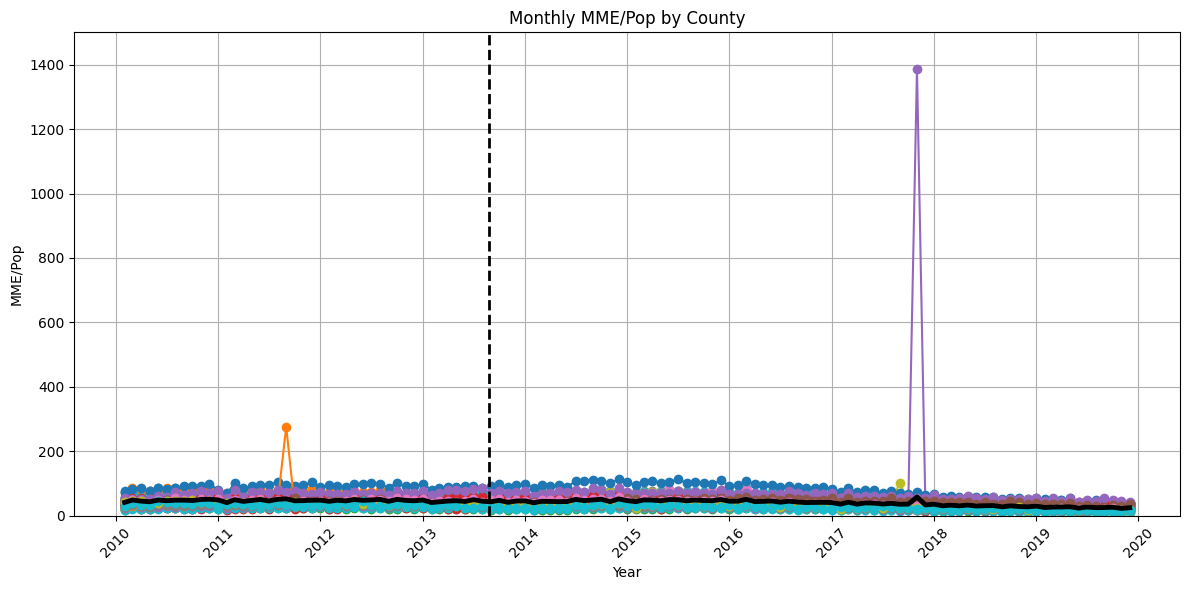

In [31]:
#code to plot the data; NOTE you can change the plt.ylim parameter to (0,100) to further closely observe the trend, this was generated so outliers could be seen
merged_data_ny['date'] = pd.to_datetime(merged_data_ny[['year', 'month']].assign(day=1))
filtered_data_ny = merged_data_ny[merged_data_ny['date'] > '2010-01-01']
plt.figure(figsize=(12, 6))

for county, group in filtered_data_ny.groupby('buyer_county'):
    plt.plot(group['date'], group['mme/pop'], marker='o', label=county)

average_trend_ny = filtered_data_ny.groupby('date')['mme/pop'].mean()
plt.plot(average_trend_ny.index, average_trend_ny, color='black', linewidth=3.5, label='Average Trend')

plt.axvline(pd.to_datetime("2013-08-27"), color='black',linestyle='--',linewidth=2,label='August 2013')

plt.title('Monthly MME/Pop by County')
plt.ylabel('MME/Pop')
plt.xlabel('Year')

plt.xticks(rotation=45)
plt.ylim(0,1500)
plt.grid()
plt.tight_layout()

plt.show()

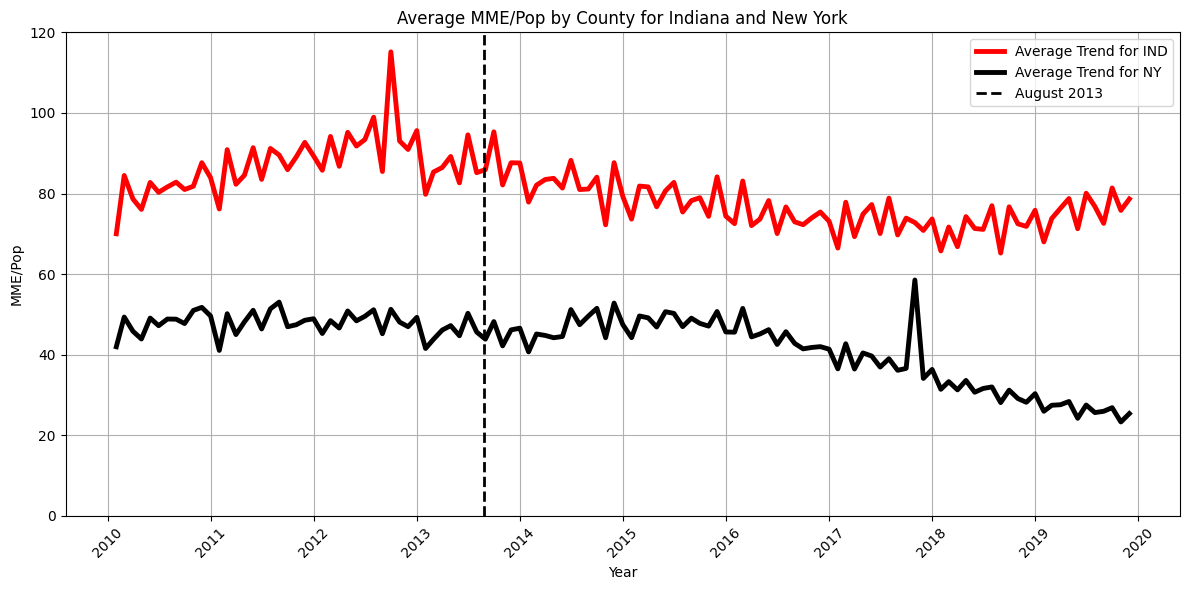

In [38]:
merged_data_ind['date'] = pd.to_datetime(merged_data_ind[['year', 'month']].assign(day=1))
filtered_data_ind = merged_data_ind[merged_data_ind['date'] > '2010-01-01']
plt.figure(figsize=(12, 6))

average_trend_ind = filtered_data_ind.groupby('date')['mme/pop'].mean()
plt.plot(average_trend_ind.index, average_trend_ind, color='red', linewidth=3.5, label='Average Trend for IND')

average_trend_ny = filtered_data_ny.groupby('date')['mme/pop'].mean()
plt.plot(average_trend_ny.index, average_trend_ny, color='black', linewidth=3.5, label='Average Trend for NY')

plt.axvline(pd.to_datetime("2013-08-27"), color='black',linestyle='--',linewidth=2,label='August 2013')

plt.title('Average MME/Pop by County for Indiana and New York')
plt.ylabel('MME/Pop')
plt.xlabel('Year')

plt.xticks(rotation=45)
plt.ylim(0,120)
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

Calculate Descriptive Statistics for Key Drugs Before and After I-STOP Goes into Effect

In [20]:
# re-merging data to keep drugname to calculate descriptive statistics of before and after ISTOP
merged_data2 = pd.merge(df_ny, county_pop_long, left_on=['buyer_county', 'year'],
                       right_on=['County Name', 'year'], how='left')
print(merged_data2.head())

   calc_base_wt_in_gm transaction_date    buyer_county    buyer_bus_act  \
0            7.567500       2006-01-01  SAINT LAWRENCE   CHAIN PHARMACY   
1            2.270250       2006-01-01          CAYUGA   CHAIN PHARMACY   
2            0.572708       2006-01-01         SUFFOLK  RETAIL PHARMACY   
3            1.145417       2006-01-01          QUEENS  RETAIL PHARMACY   
4            0.572708       2006-01-01          QUEENS  RETAIL PHARMACY   

        buyer_addl_co_info    drug_name  mme_conversion_factor  year  month  \
0         KINNEY DRUGS #09  HYDROCODONE                    1.0  2006      1   
1         KINNEY DRUGS #62  HYDROCODONE                    1.0  2006      1   
2                      NaN  HYDROCODONE                    1.0  2006      1   
3  D/B/A CROSS BAY CHEMIST  HYDROCODONE                    1.0  2006      1   
4                      NaN  HYDROCODONE                    1.0  2006      1   

   total_mme   FIPS County Name  population  
0  7567.5000    NaN         

In [21]:
#repeat process
merged_data2 = merged_data2.dropna(subset=['total_mme', 'population'])
merged_data2['mme/pop'] = merged_data2['total_mme'].astype(float) / merged_data2['population'].astype(float)
merged_data2.head()

,calc_base_wt_in_gm,transaction_date,buyer_county,buyer_bus_act,buyer_addl_co_info,drug_name,mme_conversion_factor,year,month,total_mme,FIPS,County Name,population,mme/pop
1,2.270250,2006-01-01,CAYUGA,CHAIN PHARMACY,KINNEY DRUGS #62,HYDROCODONE,1.0,2006,1,2270.2500,11.0,CAYUGA,135640.0,0.016737
2,0.572708,2006-01-01,SUFFOLK,RETAIL PHARMACY,NaN,HYDROCODONE,1.0,2006,1,572.7084,103.0,SUFFOLK,77231.0,0.007416
3,1.145417,2006-01-01,QUEENS,RETAIL PHARMACY,D/B/A CROSS BAY CHEMIST,HYDROCODONE,1.0,2006,1,1145.4169,81.0,QUEENS,157312.0,0.007281
4,0.572708,2006-01-01,QUEENS,RETAIL PHARMACY,NaN,HYDROCODONE,1.0,2006,1,572.7084,81.0,QUEENS,157312.0,0.003641
5,0.572708,2006-01-01,DUTCHESS,RETAIL PHARMACY,NaN,HYDROCODONE,1.0,2006,1,572.7084,27.0,DUTCHESS,925564.0,0.000619


In [23]:
# Convert the date column to datetime
merged_data2['date'] = pd.to_datetime(df_ny['transaction_date'])

# Define the I-STOP enactment date
istop_date = pd.Timestamp('2013-08-27')

# Split data into before and after I-STOP groups
before_istop = merged_data2[merged_data2['date'] < istop_date]
after_istop = merged_data2[merged_data2['date'] >= istop_date]

In [24]:
merged_data2['drug_name'].unique()

array(['HYDROCODONE', 'CODEINE', 'OXYCODONE', 'FENTANYL', 'MORPHINE',
       'HYDROMORPHONE'], dtype=object)

In [25]:
# Calculate descriptive statistics for the before I-STOP period
before_stats = before_istop.groupby('drug_name')['mme/pop'].agg(['mean', 'std', 'count']).reset_index()
before_stats.rename(columns={'mean': 'mean_before', 'std': 'std_before', 'count': 'count_before'}, inplace=True)

# Calculate descriptive statistics for the after I-STOP period
after_stats = after_istop.groupby('drug_name')['mme/pop'].agg(['mean', 'std', 'count']).reset_index()
after_stats.rename(columns={'mean': 'mean_after', 'std': 'std_after', 'count': 'count_after'}, inplace=True)

# Merge the statistics for comparison
descriptive_stats = pd.merge(before_stats, after_stats, on='drug_name', how='outer')
descriptive_stats_df = pd.DataFrame(descriptive_stats)
# Display the descriptive statistics
print(descriptive_stats_df)


       drug_name  mean_before  std_before  count_before  mean_after  \
0        CODEINE     0.016784    0.234611        803559    0.003852   
1       FENTANYL     0.100126    0.245964       1598070    0.040712   
2    HYDROCODONE     0.016922    0.311267       5885758    0.009391   
3  HYDROMORPHONE     0.029989    0.098236        503902    0.011141   
4       MORPHINE     0.045444    1.541327       1074979    0.018153   
5      OXYCODONE     0.045585    0.236148       4820121    0.017881   

   std_after  count_after  
0   0.015761       478557  
1   0.105365      1095130  
2   0.023819      2638198  
3   0.028474       481789  
4   0.954987      1001743  
5   0.044939      4901840  


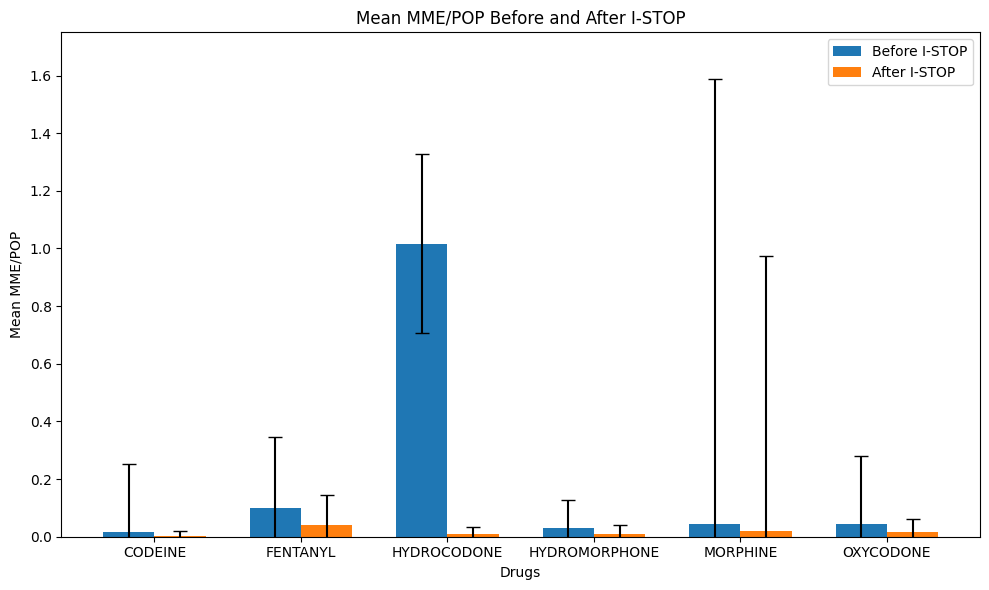

In [26]:
#GRAPH RESULTS
drugs = ['CODEINE', 'FENTANYL', 'HYDROCODONE', 'HYDROMORPHONE', 'MORPHINE','OXYCODONE']
means_before = [0.016784, 0.100126, 1.016922, 0.029989, 0.045444, 0.045585] 
means_after = [0.003852, 0.040712, 0.009391, 0.011141, 0.018153, 0.017881]  
std_before = [0.234611, 0.245964, 0.311267, 0.098236, 1.541327, 0.236148] 
std_after = [0.015761, 0.105365, 0.023819, 0.028474, 0.954987, 0.044939]  

# Set up the bar chart
bar_width = 0.35
x = np.arange(len(drugs))

# Create bars for means
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - bar_width/2, means_before, bar_width, yerr=std_before, label='Before I-STOP', capsize=5)
bars2 = ax.bar(x + bar_width/2, means_after, bar_width, yerr=std_after, label='After I-STOP', capsize=5)

# Add labels and title
ax.set_xlabel('Drugs')
ax.set_ylabel('Mean MME/POP')
ax.set_title('Mean MME/POP Before and After I-STOP')
ax.set_xticks(x)
ax.set_xticklabels(drugs)
ax.legend()
ax.set_ylim(0, 1.75)

# Show the plot
plt.tight_layout()
plt.show()